In [1]:
# importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('shopping_trends_updated.csv')

In [3]:
# analizamos los tipos de datos y si existen datos faltantes.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
data = data.drop("Customer ID",axis = 1)

In [5]:
df_num = data.select_dtypes(include = ['int64','float64'])

In [6]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    3900 non-null   int64  
 1   Purchase Amount (USD)  3900 non-null   int64  
 2   Review Rating          3900 non-null   float64
 3   Previous Purchases     3900 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 122.0 KB


In [7]:
df_num

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,55,53,3.1,14
1,19,64,3.1,2
2,50,73,3.1,23
3,21,90,3.5,49
4,45,49,2.7,31
...,...,...,...,...
3895,40,28,4.2,32
3896,52,49,4.5,41
3897,46,33,2.9,24
3898,44,77,3.8,24


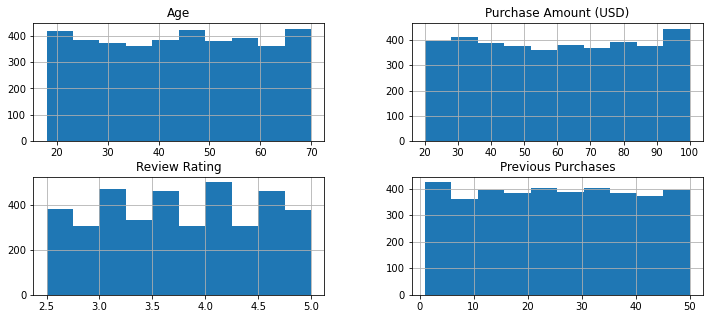

In [8]:
df_num.hist(figsize = (12,5))
plt.show()

In [9]:
df_cat = data.drop(list(df_num),axis = 1)

In [10]:
df_cat = df_cat.drop(['Location','Item Purchased','Color'],axis = 1)

In [11]:
for i in list(df_cat.columns):
    print(df_cat[i].unique())


['Male' 'Female']
['Clothing' 'Footwear' 'Outerwear' 'Accessories']
['L' 'S' 'M' 'XL']
['Winter' 'Spring' 'Summer' 'Fall']
['Yes' 'No']
['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']
['Yes' 'No']
['Yes' 'No']
['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']
['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 3 Months']


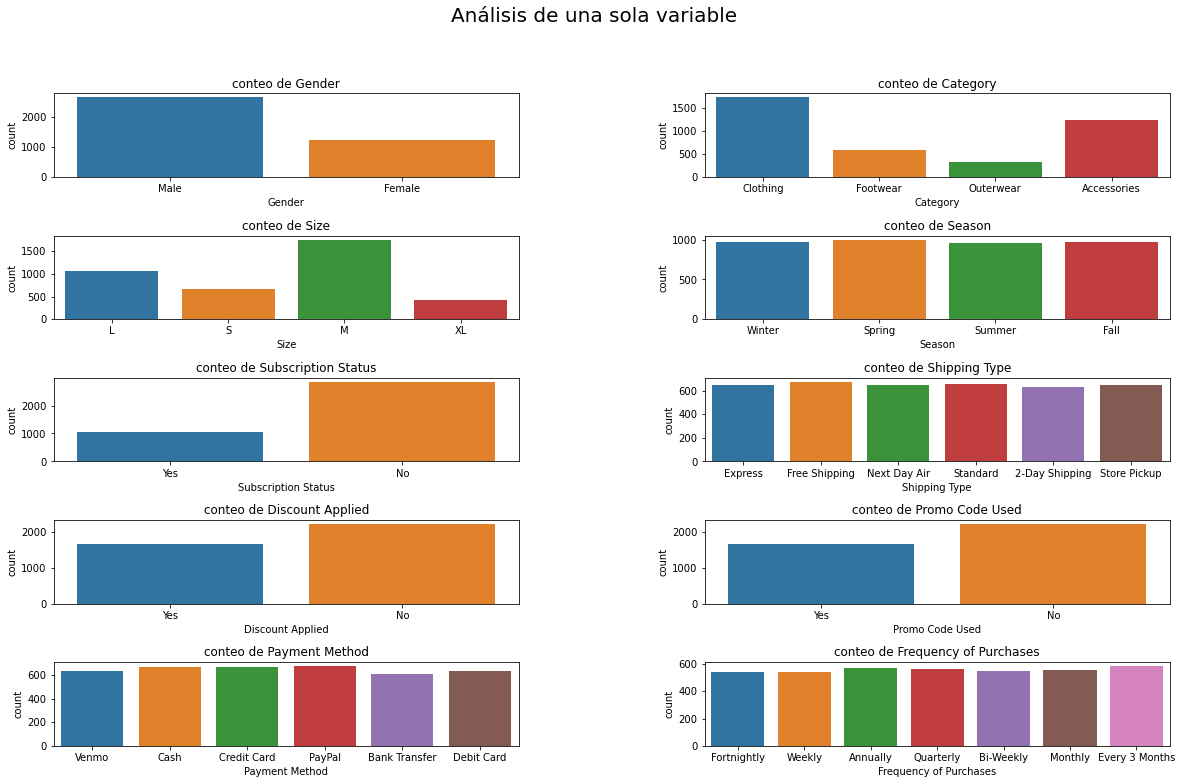

In [12]:
fig,ax = plt.subplots(5,2, figsize = (20,12))
plt.suptitle('Análisis de una sola variable',fontsize = 20)
plt.subplots_adjust(hspace= .7, wspace = .4)
for idx, column in enumerate (list(df_cat.columns)):
    row, col = divmod(idx, 2)
    sns.countplot(data = df_cat, x = column, ax = ax[row, col])
    ax[row,col].set_title('conteo de ' + column)
    
   


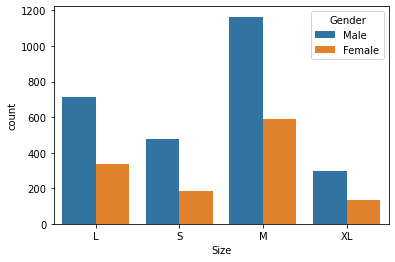

In [31]:
sns.countplot(data = df_cat, x = 'Size', hue = 'Gender')
plt.show()

conclusiones:
- más de la mitad son hombres.
- La mayoría de las compras son de ropa, seguido de los accesorios.
- El promedio de las tallas compradas son de talla M.
- No hay mucha diferencia entre las Temporadas.
- Aproximadamente solo el 25% tiene suscripción.
- No existe mucha diferencia entre el tipo de compra.
- Aproximadamente el 75% de las compras tienen descuento.
- No hay mucha diferencia entre los métodos de pago.
- No hay mucha diferencia entre la frecuencia de compras.

La base datos está conformada principalmente por hombres, mientras que las mujeres representan el 40%. Las preferencias en todo lo que engobla la vestimenta, lo que más predomina es la ropa, seguido de los accesorios. pocos son los que obtienen suscripción y la grán mayoría aprovecha las promociones en la tienda.


In [14]:
data.loc[:,'Age_cat'] = '19-25'
data.loc[(data['Age']>=26) & (data['Age']<=40),'Age_cat'] = '26-40'
data.loc[(data['Age']>=41) & (data['Age']<=65),'Age_cat'] ='41-65'
data.loc[data['Age']>=65,'Age_cat'] = '>=65'

In [15]:
data['Age_cat'] = data['Age_cat'].astype(str)

#### Analizando el comportamiento de los consumidores por edad

In [16]:
# análisis bivariable

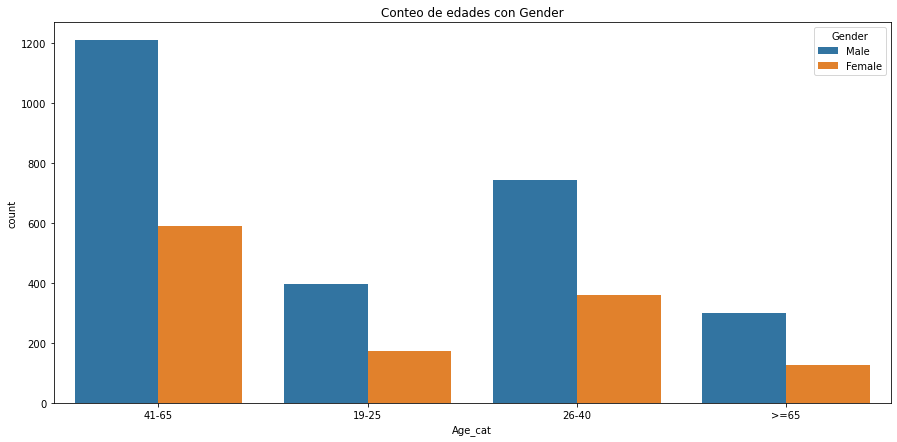

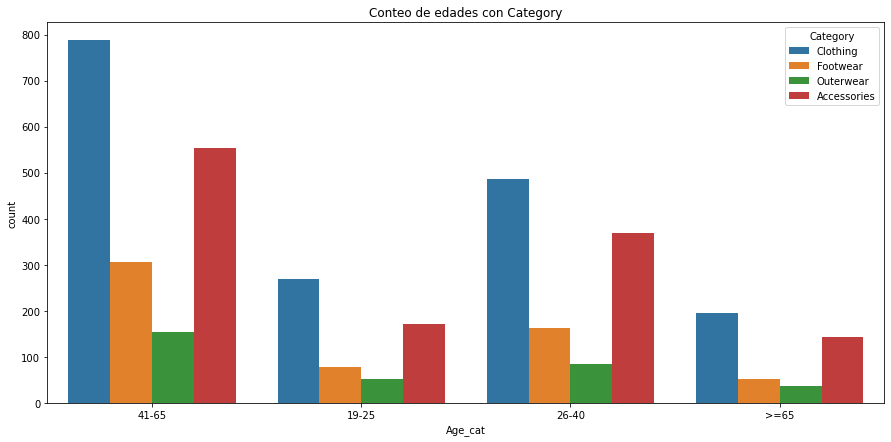

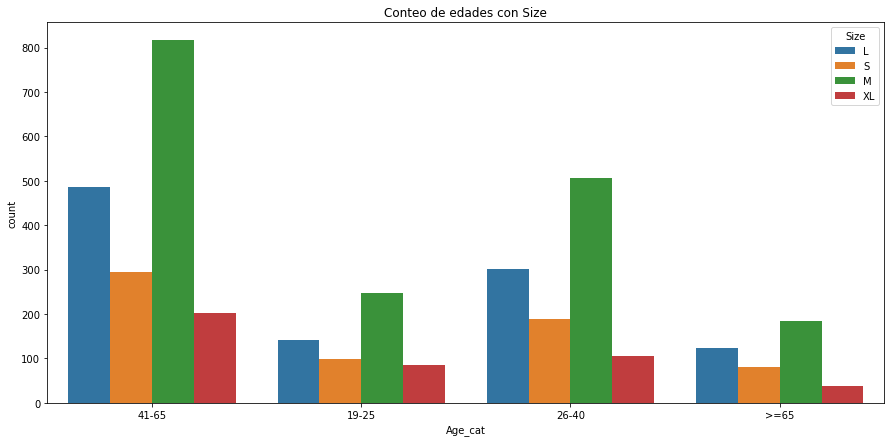

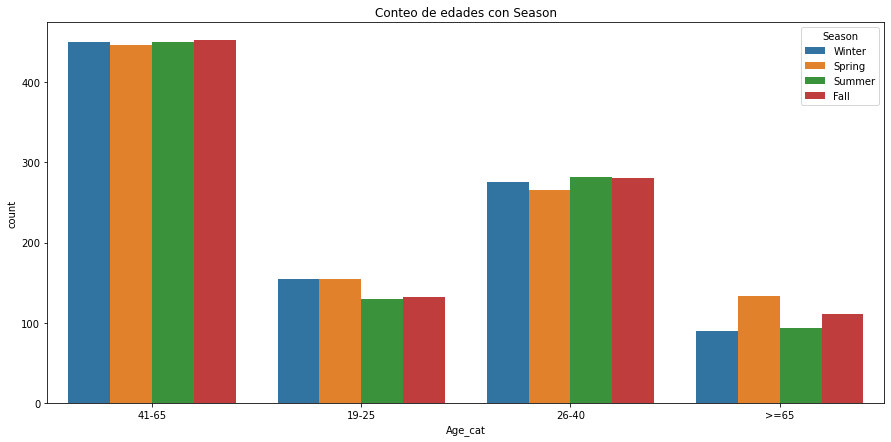

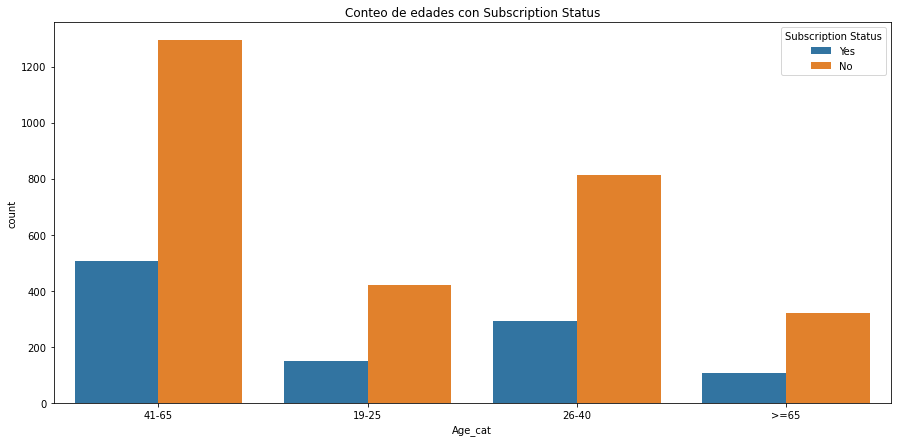

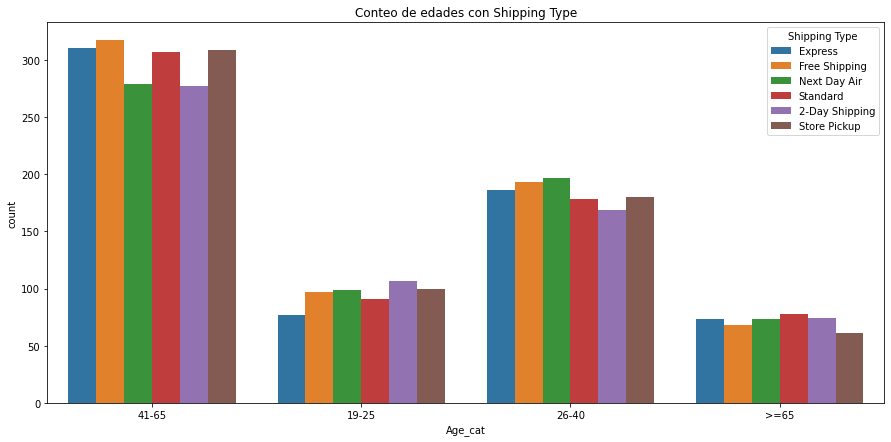

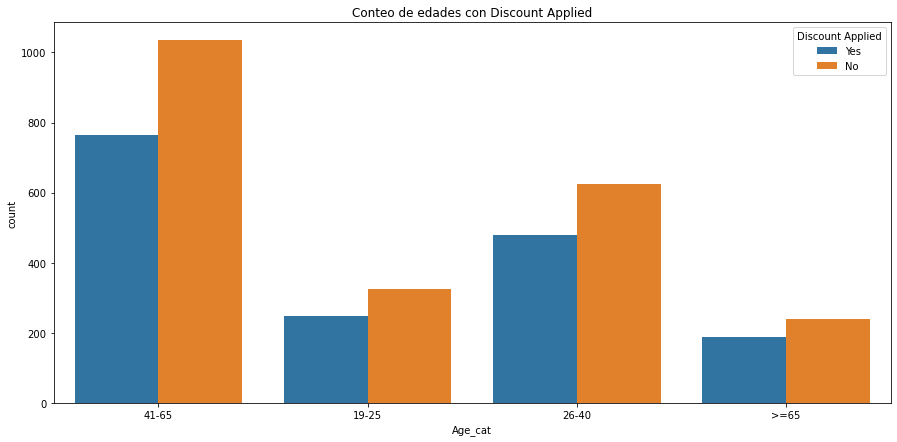

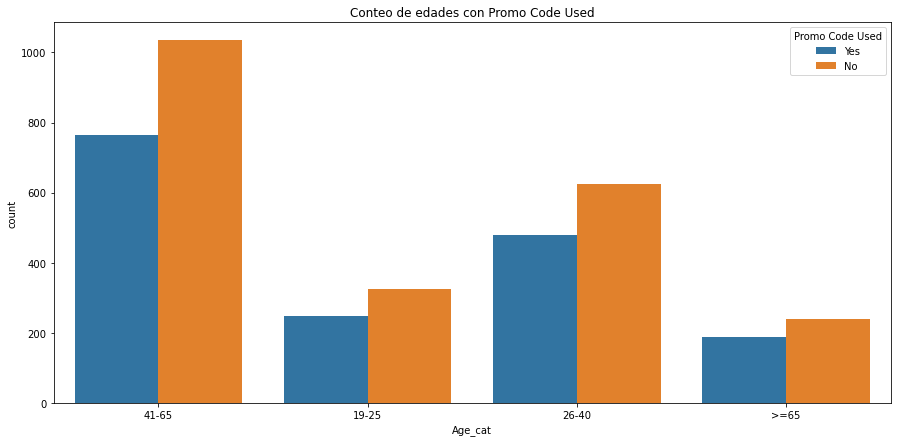

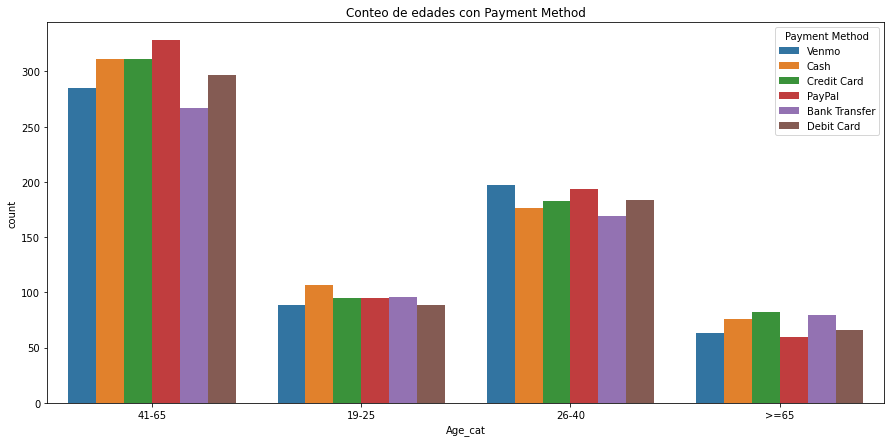

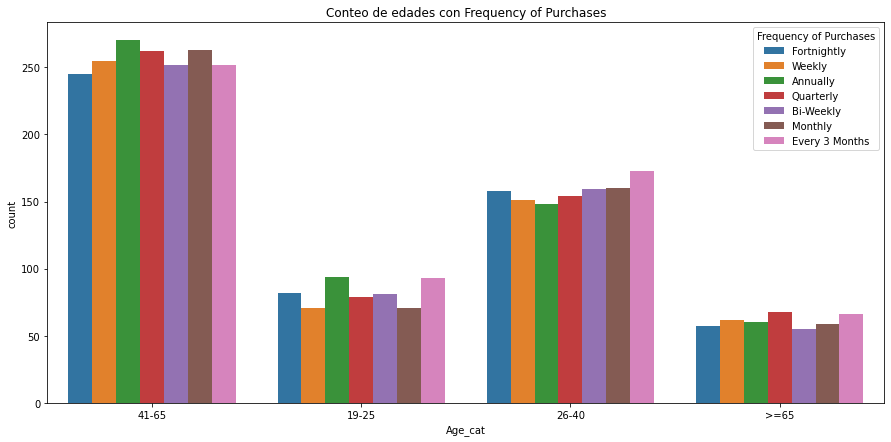

In [17]:

for i in df_cat:
    fig,ax = plt.subplots(figsize = (15,7))
    sns.countplot(data = data, x = data['Age_cat'], hue = i, ax = ax)
    plt.title('Conteo de edades con '+ i)
    plt.show()

In [18]:
# ¿Pero quienes tienden a gastar más cuando compran ?
age_usd = data.groupby('Age_cat',as_index = False).mean()

In [19]:
age_usd

,Age_cat,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,19-25,21.562172,60.647986,3.816287,24.633975
1,26-40,32.883046,59.693563,3.752131,25.041704
2,41-65,52.495275,59.541412,3.719455,25.523068
3,>=65,67.555035,59.704918,3.784075,26.388759


<AxesSubplot:xlabel='Age_cat', ylabel='Purchase Amount (USD)'>

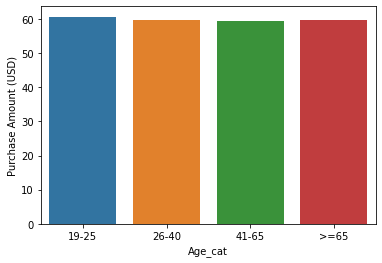

In [20]:
sns.barplot(data = age_usd, x = 'Age_cat', y = 'Purchase Amount (USD)')

In [21]:
data.groupby('Age_cat',as_index = False)['Purchase Amount (USD)'].mean()

,Age_cat,Purchase Amount (USD)
0,19-25,60.647986
1,26-40,59.693563
2,41-65,59.541412
3,>=65,59.704918


Conclusiones:
- Las personas de 65+ años, tienden a comprar ligeramente más en la primavera y otoño.
- Los jóvenes entre 19 y 25 años son los que menos utilizan el servicio express.
- Las edades entre 41 y 65 prefieren los otros servicios ligeramente sobre Next Day Air y 2-Day Shipping.
- Las personas jóvenes y mayores a 65 son las que más aprovechan las promociones. 
- Los jóvenes tienden ligeramente a pagar con efectivo y las personas mayores tienden ligeramente a pagar con tarjeta de crédito.
- El promedio de compra no muestra diferencia entre las edades.

<AxesSubplot:xlabel='Age_cat', ylabel='count'>

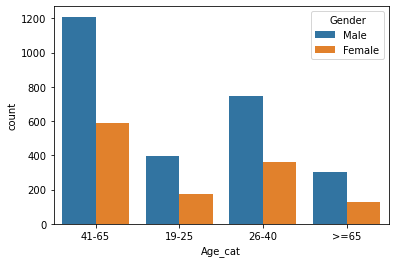

In [22]:
sns.countplot(data = data, x = data['Age_cat'], hue = 'Gender')


In [23]:
# Ahora veremos los 5 accesorios más comprados en las localidades con más registros

In [24]:
loc_item = data.groupby(['Item Purchased','Gender'], as_index = False).agg({'Category':'count','Purchase Amount (USD)':'mean'})

In [25]:
loc_item = loc_item.rename(columns = {'Category':'Cuenta','Purchase Amount (USD)':'Purchase Amount (USD) mean'})

In [26]:
loc_item = loc_item.sort_values(by= 'Purchase Amount (USD) mean', ascending = False)

In [27]:
loc_item

,Item Purchased,Gender,Cuenta,Purchase Amount (USD) mean
10,Dress,Female,52,67.153846
22,Jeans,Female,29,66.689655
12,Gloves,Female,37,65.297297
0,Backpack,Female,37,65.216216
24,Jewelry,Female,52,64.826923
49,T-shirt,Male,101,64.663366
6,Boots,Female,50,64.520000
35,Shoes,Male,102,62.274510
38,Skirt,Female,49,62.265306
33,Shirt,Male,110,61.636364


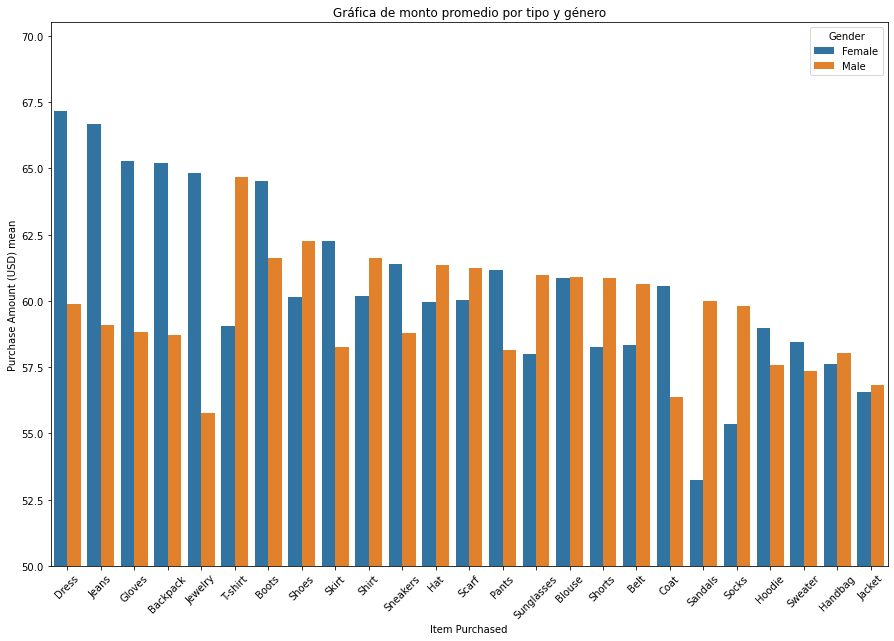

In [30]:
plt.figure(figsize = (15,10))
sns.barplot(data = loc_item, x = 'Item Purchased', y = 'Purchase Amount (USD) mean', hue = 'Gender')
plt.xticks(rotation = 45)
plt.ylim(ymin = 50)
plt.title('Gráfica de monto promedio por tipo y género')
plt.show()

conclusiones:

- Las mujeres tienden a gastar más ligeramente en promedio en vestidos, jeans, guantes, mochilas, joyería. Mientras que los hombres tienden a gastar más en playeras, lentes, shorts, sandaleas y calcetas.